In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('grid.csv')
df['dx'] = 1 / pow(2, df['L'])
df['x'] = df['i'] * df['dx'] + df['dx'] / 2
df['y'] = df['j'] * df['dx'] + df['dx'] / 2
df['z'] = df['k'] * df['dx'] + df['dx'] / 2

0.5039370078740157


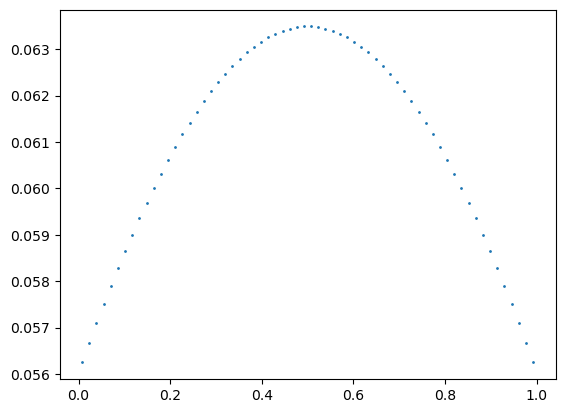

In [3]:
z_values = sorted(list(set(df.z)))
i = min(round(len(z_values)*0.5), len(z_values)-1)
print(i/len(z_values))
z = z_values[i]

plt.scatter(list(df[(df.y==z) & (df.z==z)]['x']), list(df[(df.y==z) & (df.z==z)]['rho']), s=1)

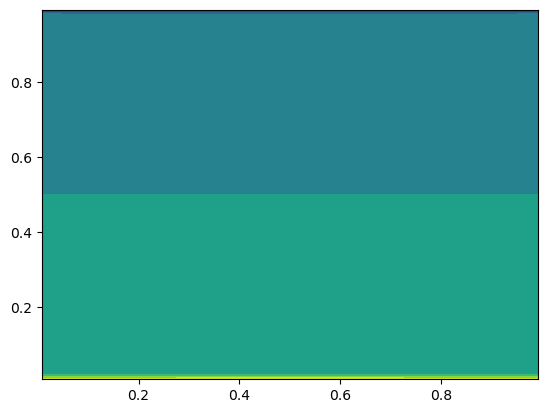

In [13]:
data_X = sorted(list(set(df[(df.z==z)]['x'])))
data_Y = sorted(list(set(df[(df.z==z)]['y'])))
data_Z = [[list(df[(df.z==z)&(df.y==y)&(df.x==x)].rho_grad_x)[0] if len(df[(df.z==z)&(df.y==y)&(df.x==x)])>0 else None for y in data_Y] for x in data_X]
plt.contourf(data_X, data_Y, data_Z)

0.9921259842519685


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

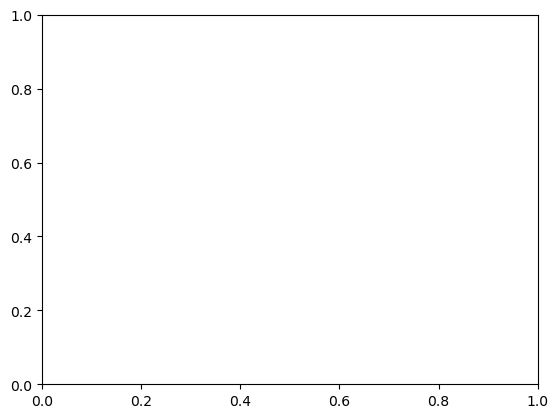

In [14]:
i = min(round(len(z_values)*1.0), len(z_values)-1)
print(i/len(z_values))
z = z_values[min(i, len(z_values)-1)]

data_X = sorted(list(set(df[(df.z==z)]['x'])))
data_Y = sorted(list(set(df[(df.z==z)]['y'])))
data_Z = [[list(df[(df.z==z)&(df.y==y)&(df.x==x)].rho_grad_x)[0] if len(df[(df.z==z)&(df.y==y)&(df.x==x)])>0 else None for y in data_Y] for x in data_X]
plt.contourf(data_X, data_Y, data_Z)

In [16]:
for i in range(len(data_Z)):
    for j in range(len(data_Z[0])):
        if data_Z[i][j] is not None:
            print(i, j, data_Z[i][j])

0 26 0.861844
0 27 0.862897
0 28 0.86374
0 29 0.864373
0 30 0.864795
0 31 0.865006
0 32 0.865006
0 33 0.864795
0 34 0.864373
0 35 0.86374
0 36 0.862897
0 37 0.861844
1 26 0.0238384
1 27 0.0238675
1 28 0.0238908
1 29 0.0239083
1 30 0.02392
1 31 0.0239259
1 32 0.0239259
1 33 0.02392
1 34 0.0239083
1 35 0.0238908
1 36 0.0238675
1 37 0.0238384
2 20 0.018568
2 21 0.0208887
2 22 0.0188706
2 23 0.0207787
2 24 0.0191571
2 25 0.020647
2 26 0.0232263
2 27 0.0232547
2 28 0.0232774
2 29 0.0232944
2 30 0.0233058
2 31 0.0233115
2 32 0.0233115
2 33 0.0233058
2 34 0.0232944
2 35 0.0232774
2 36 0.0232547
2 37 0.0232263
2 38 0.020647
2 39 0.0191571
2 40 0.0207787
2 41 0.0188706
2 42 0.0208887
2 43 0.018568
3 20 0.0223187
3 21 0.0223788
3 22 0.0224335
3 23 0.0224828
3 24 0.0225268
3 25 0.0225653
3 26 0.0225984
3 27 0.022626
3 28 0.0226481
3 29 0.0226647
3 30 0.0226758
3 31 0.0226813
3 32 0.0226813
3 33 0.0226758
3 34 0.0226647
3 35 0.0226481
3 36 0.022626
3 37 0.0225984
3 38 0.0225653
3 39 0.0225268
3 40

0.9921259842519685


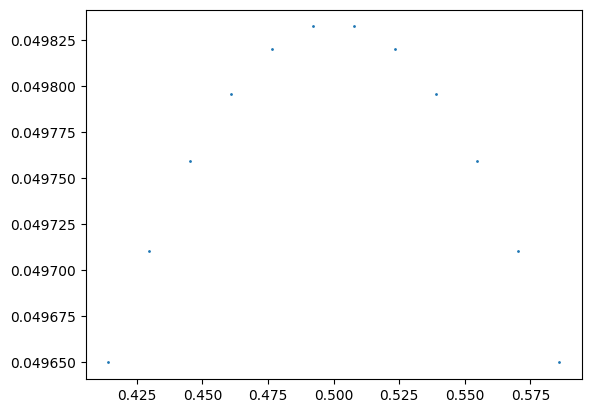

In [7]:

i = min(round(len(z_values)*1.0), len(z_values)-1)
print(i/len(z_values))
z = z_values[min(i, len(z_values)-1)]

plt.scatter(list(df[(df.y==z) & (df.z==z)]['x']), list(df[(df.y==z) & (df.z==z)]['rho']), s=1)

In [21]:
z_values = sorted(list(set(df.z)))
len(df)

In [85]:

def scatter_leaf_slice(z_percent):
    i = min(round(len(z_values)*z_percent), len(z_values)-1)
    print(i/len(z_values))
    z = z_values[i]
    data = df[(df['flag_leaf']==1)&(df['z']==z)]
    plt.scatter(list(data['x']), list(data['y']), s=list(0.1*(7-data['L'])))

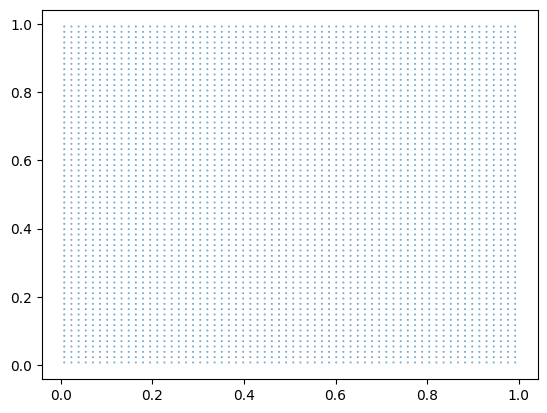

In [68]:
scatter_leaf_slice(0.5)

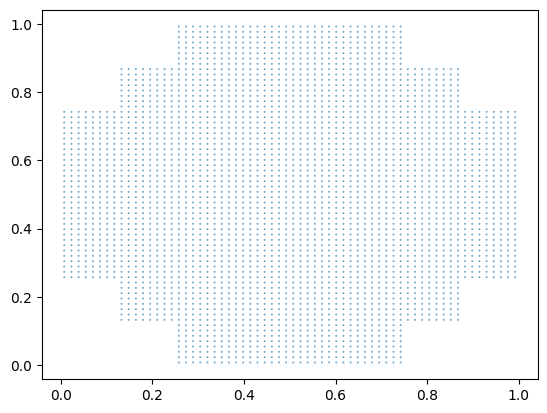

In [69]:
scatter_leaf_slice(0.9)

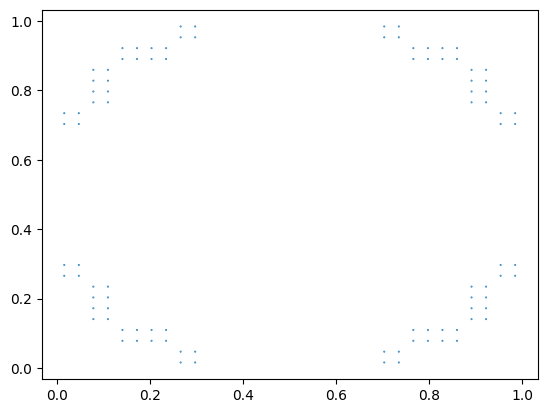

In [44]:
scatter_leaf_slice(0.95)

0.9921259842519685


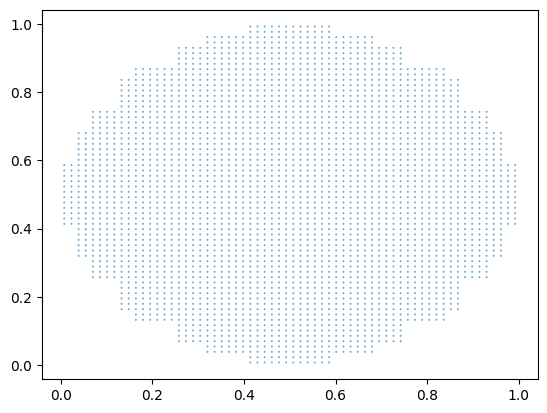

In [47]:
scatter_leaf_slice(0.99)

In [90]:

z_both_leaf_values = sorted(list(set(df[df.flag_leaf==0].z).intersection(df[df.flag_leaf==1].z)))

def scatter_all_slice(z_percent):
    i = min(round(len(z_both_leaf_values)*z_percent), len(z_both_leaf_values)-1)
    print(i/len(z_both_leaf_values))
    z = z_both_leaf_values[i]
    data = df[(df['z']==z)]
    plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
    plt.scatter(list(data[df['flag_leaf']==1]['x']), list(data[df['flag_leaf']==1]['y']), s=list(0.1*(7-data[df['flag_leaf']==1]['L'])), label='leaf')
    plt.legend()

z_non_leaf_values = sorted(list(set(df[df.flag_leaf==0].z)))

def scatter_non_leaf_slice(z_percent):
    i = min(round(len(z_non_leaf_values)*z_percent), len(z_non_leaf_values)-1)
    print(i/len(z_non_leaf_values))
    z = z_non_leaf_values[i]
    data = df[(df['flag_leaf']==0)&(df['z']==z)]
    plt.scatter(list(data['x']), list(data['y']), s=list(0.1*(7-data['L'])))

In [54]:
len(df[(df['flag_leaf']==0)])

35001

In [55]:
len(df[(df['flag_leaf']==1)])

245008

0.5


C:\Users\natal\AppData\Local\Temp\ipykernel_24124\4237089018.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])))
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\4237089018.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])))
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\4237089018.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])))
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\4237089018.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data

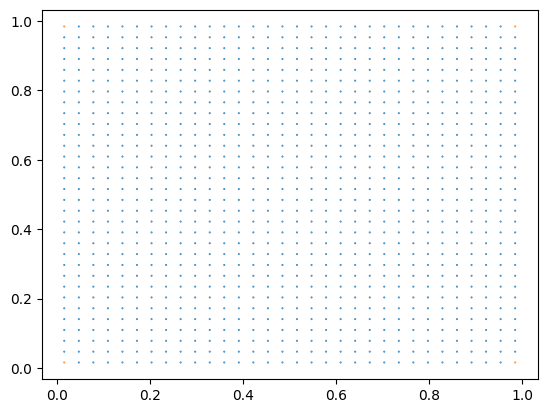

In [88]:
scatter_all_slice(0.5)

0.7647058823529411


C:\Users\natal\AppData\Local\Temp\ipykernel_24124\195878834.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\195878834.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\195878834.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\195878834.py:9: UserWarning: Boolean Series key will be reindexed to match Da

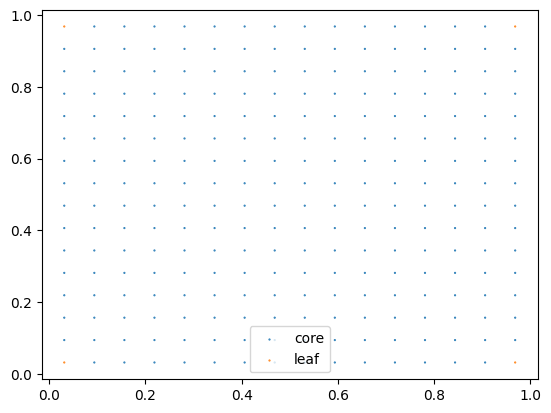

In [92]:
scatter_all_slice(0.75)

In [81]:
z_percent = 0.5
i = min(round(len(z_both_leaf_values)*z_percent), len(z_both_leaf_values)-1)
if i == len(z_both_leaf_values)-1:
    print((len(z_both_leaf_values)-1)/len(z_both_leaf_values))
z = z_both_leaf_values[i]
((df['flag_leaf']==1)&(df['z']==z) == (df['z']==z)).all()

False

In [98]:
def scatter_all_region(z):
    data = df[(df['z']<z+0.125)&((df['z']>z-0.125))]
    plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
    plt.scatter(list(data[df['flag_leaf']==1]['x']), list(data[df['flag_leaf']==1]['y']), s=list(0.1*(7-data[df['flag_leaf']==1]['L'])), label='leaf')
    plt.legend()

C:\Users\natal\AppData\Local\Temp\ipykernel_24124\2742464419.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\2742464419.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\2742464419.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(list(data[df['flag_leaf']==0]['x']), list(data[df['flag_leaf']==0]['y']), s=list(0.1*(7-data[df['flag_leaf']==0]['L'])), label='core')
C:\Users\natal\AppData\Local\Temp\ipykernel_24124\2742464419.py:4: UserWarning: Boolean Series key will be reindexed to matc

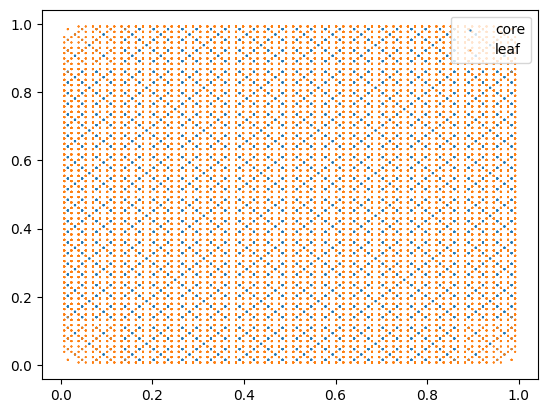

In [99]:
scatter_all_region(0.75)

In [97]:
df['z_min'] = df.z - 1/2**(df.L+1)
df['z_max'] = df.z + 1/2**(df.L+1)
df['x_min'] = df.x - 1/2**(df.L+1)
df['x_max'] = df.x + 1/2**(df.L+1)
df['y_min'] = df.y - 1/2**(df.L+1)
df['y_max'] = df.y + 1/2**(df.L+1)

In [117]:
def plot_grid_slice(z):
    if z > z_values[-1]:
        z = z_values[-1]
    print('z=', z)
    data = df[(df['z_min']<=z)&((df['z_max']>=z))&(df['flag_leaf']==1)]
    for y in set(data.y_min):
        d = data[data.y_min==y]
        plt.plot(list(d.x_min), list(d.y_min), c='b', lw=0.1)
        plt.plot(list(d.x_max), list(d.y_min), c='b', lw=0.1)
    for x in set(data.x_min):
        d = data[data.x_min==x]
        plt.plot(list(d.x_min), list(d.y_min), c='b', lw=0.1)
        plt.plot(list(d.x_min), list(d.y_max), c='b', lw=0.1)
    for y in set(data.y_max):
        d = data[data.y_max==y]
        plt.plot(list(d.x_min), list(d.y_max), c='b', lw=0.1)
        plt.plot(list(d.x_max), list(d.y_max), c='b', lw=0.1)
    for x in set(data.x_max):
        d = data[data.x_max==x]
        plt.plot(list(d.x_max), list(d.y_min), c='b', lw=0.1)
        plt.plot(list(d.x_max), list(d.y_max), c='b', lw=0.1)

z= 0.5


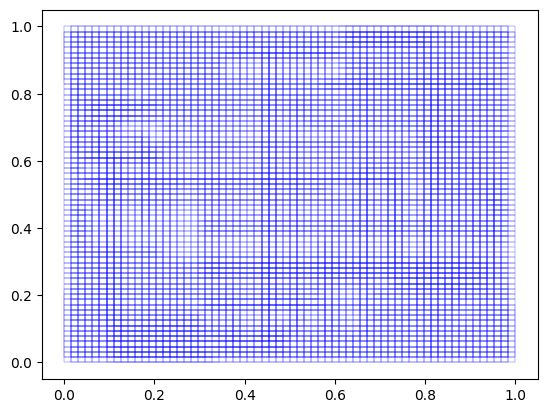

In [118]:
plot_grid_slice(0.5)

z= 0.9921875


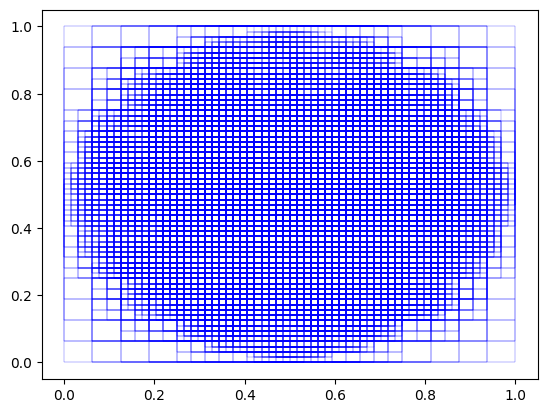

In [115]:
plot_grid_slice(1)

z= 0.7


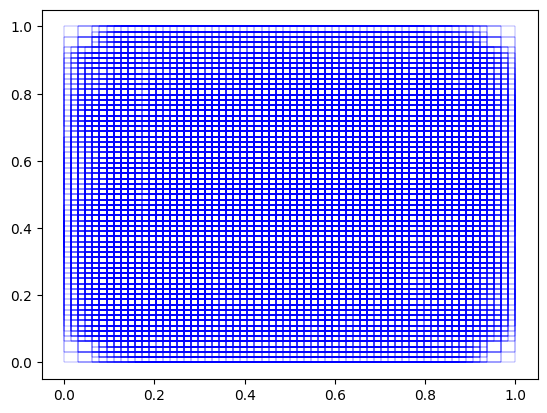

In [120]:
plot_grid_slice(0.7)